Load data file

In [2]:
import pandas as pd

data = pd.read_csv('shopping.csv')

# 1. How many rows and columns are there in the dataset?
print(data.shape)

(12330, 18)


In [3]:
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Data understanding

1. 'Administrative','Informational', 'ProductRelated': is type of pages that user visited.
2. _Duration: amount of time that user spent on each type of pages.
3. BounceRates: percentage of visitors who leave a website after viewing only one page.
4. ExitRates: the percentage of visitors who leave a website or page.
5. PageValues: a metric that measures how valuable a page is to a business
6. SpecialDay: how close the date of the user’s session is to a special day 
7. Month: month that user visit the site
8. 'OperatingSystems', 'Browser', 'Region', 'TrafficType':
9. VisitorType: type of visitor such as ['Returning_Visitor', 'New_Visitor', 'Other']
10. Weekend: wheater or not user visit on weekend
11. Revenue: wheater or not user go through with a purchase


Check for null value

In [5]:
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Data Visualization

/var/folders/jq/hpczgg0n4ygc7068cypl94ph0000gn/T/ipykernel_60677/3676432757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Revenue", palette="coolwarm")


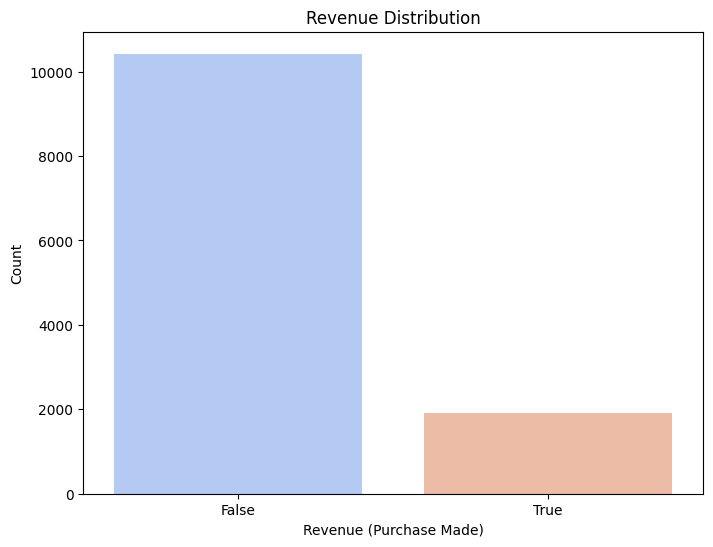

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Revenue Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Revenue", palette="coolwarm")
plt.title("Revenue Distribution")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Count")
plt.show()

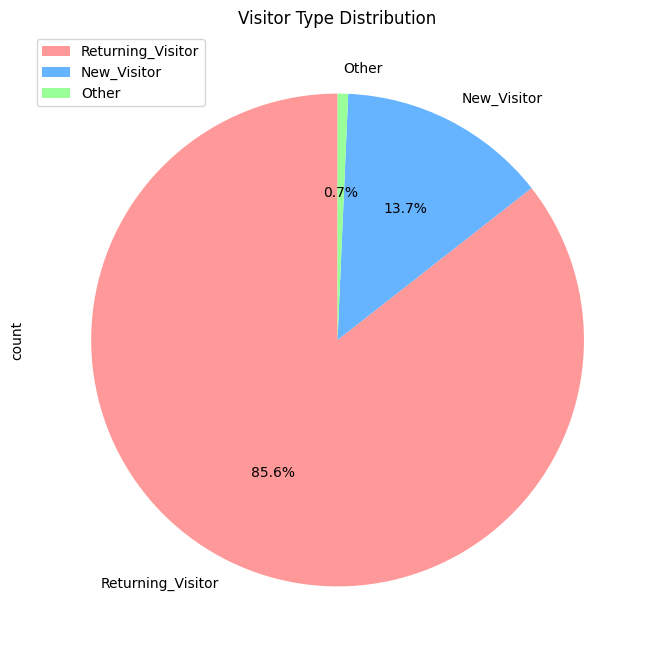

In [10]:
# Pie chart for VisitorType
plt.figure(figsize=(8, 8))
data['VisitorType'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Visitor Type Distribution")
plt.legend()
plt.show()

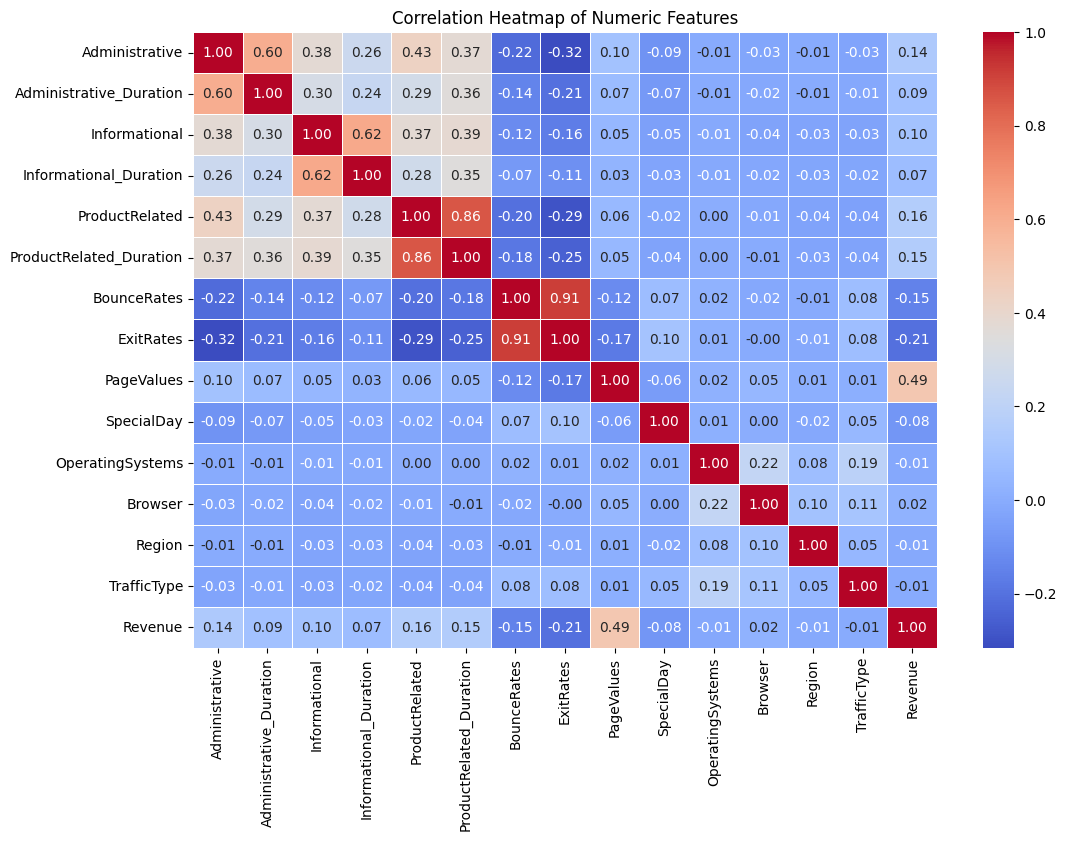

In [8]:
# Correlation Heatmap

# Convert the 'Revenue' column to binary
data['Revenue'] = data['Revenue'].map({True: 1, False: 0})

# Exclude non-numeric columns for correlation computation
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

/var/folders/jq/hpczgg0n4ygc7068cypl94ph0000gn/T/ipykernel_60677/1387463777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Revenue", y="BounceRates", palette="coolwarm")
/var/folders/jq/hpczgg0n4ygc7068cypl94ph0000gn/T/ipykernel_60677/1387463777.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Revenue", y="ExitRates", palette="coolwarm")
/var/folders/jq/hpczgg0n4ygc7068cypl94ph0000gn/T/ipykernel_60677/1387463777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Revenue", y="PageValues", pa

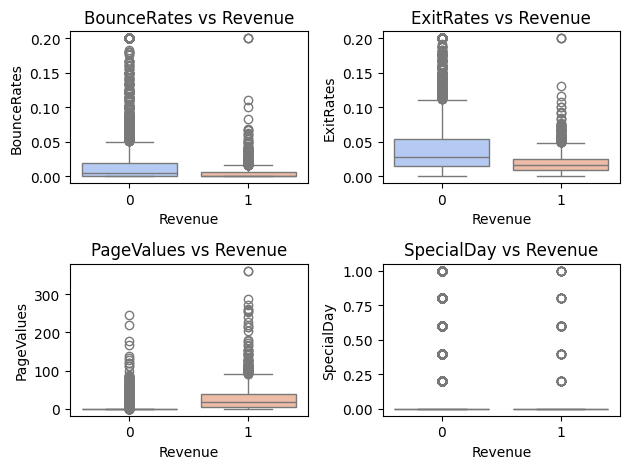

In [9]:
# BounceRates vs Revenue
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Revenue", y="BounceRates", palette="coolwarm")
plt.title("BounceRates vs Revenue")

# ExitRates vs Revenue
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x="Revenue", y="ExitRates", palette="coolwarm")
plt.title("ExitRates vs Revenue")

# PageValues vs Revenue
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x="Revenue", y="PageValues", palette="coolwarm")
plt.title("PageValues vs Revenue")

# SpecialDay vs Revenue
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x="Revenue", y="SpecialDay", palette="coolwarm")
plt.title("SpecialDay vs Revenue")

plt.tight_layout()
plt.show()

1. BounceRates vs Revenue:

Sessions with no purchase (Revenue = False) tend to have higher BounceRates.
Lower BounceRates are more associated with purchases (Revenue = True), indicating that users who explore more pages are more likely to buy.

2. ExitRates vs Revenue:

Similarly to BounceRates, sessions with no purchase have higher ExitRates.
Lower ExitRates suggest a higher likelihood of making a purchase.

3. PageValues vs Revenue:

Sessions with purchases (Revenue = True) have significantly higher PageValues.
PageValues seems to reflect a page’s importance, suggesting users who visit high-value pages are more likely to make a purchase.

4. SpecialDay vs Revenue:

While SpecialDay is mostly zero for both Revenue = True and Revenue = False, higher SpecialDay values (closer to special days) are slightly associated with purchases.
This suggests special days might have a minor influence on purchase behavio

### Evaluation matrice

- Accuracy can be misleading in imbalanced datasets
- Sensitivity (True Positive Rate): measures the proportion of actual positive cases (users who made a purchase) that were correctly identified.
- Specificity (True Negative Rate):  measures the proportion of actual negative cases (users who did not make a purchase) that were correctly identified.
